<a href="https://colab.research.google.com/github/leinaxd/NOTES/blob/main/digital_image_processing/notebooks/2D_DFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

(532, 796, 3)


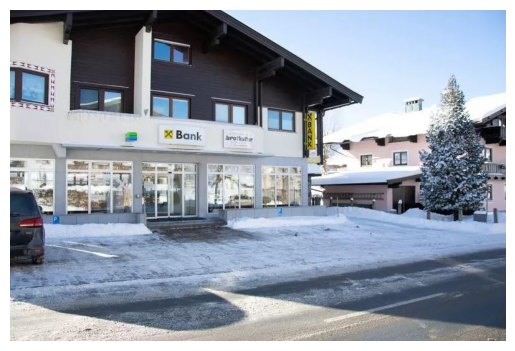

In [ ]:
url = "https://github.com/leinaxd/NOTES/raw/main/digital_image_processing/notebooks/bank.jpeg"
with urllib.request.urlopen(url) as url:
    img = plt.imread(url, format='jpg')
plt.imshow(img)
plt.axis('off')

print(img.shape)

In [ ]:
r_mask = img[:, :, 0]
g_mask = img[:, :, 1]
b_mask = img[:, :, 2]

#turn image to gray
g_img = r_mask*0.2989 + g_mask*0.5870 + b_mask*0.1140
u_img = np.uint8(g_img)

2D DFT

Basis function

In [ ]:

def basis_fn(m, n, NFFT=256):
    X = np.linspace(0, NFFT-1, NFFT)
    Y = np.linspace(0, NFFT-1, NFFT)
    x, y = np.meshgrid(X, Y)
    
    fn = np.exp(-2j*np.pi * (m/NFFT*x + n/NFFT*y))
    
    fn = np.real(fn)
    # im = real(exp(-j*2*pi*(m*x/N + n*Y/N)))

    # if m==0 and n == 0:
    #     im = round(im)
    plt.imshow(fn, cmap='gray')
    return fn

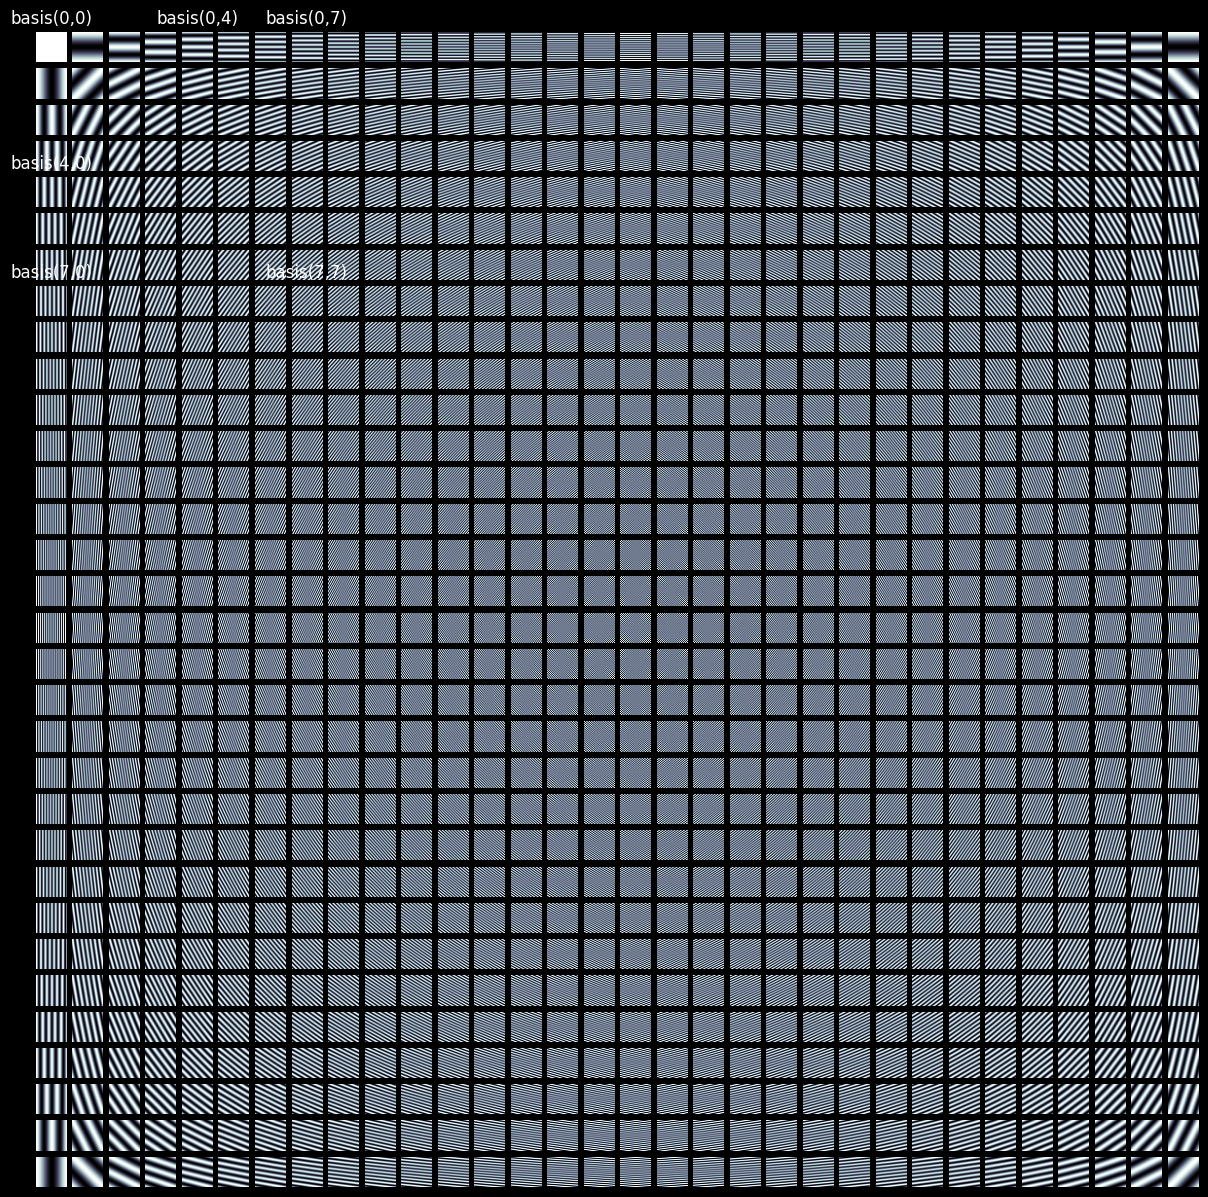

In [81]:
NFFT = 8
plt.style.use('dark_background')
fig, ax = plt.subplots(NFFT, NFFT, figsize=(15, 15))
for x in range(NFFT):
    for y in range(NFFT):
        ax[x,y].imshow(basis_fn(x, y, NFFT), cmap='bone',vmin=-1, vmax=1)
        # ax[x,y].set_title(f'({x},{y})')
        ax[x,y].axis('off')

ax[ 0, 0].set_title('basis(0,0)')
ax[ 0, 7].set_title('basis(0,7)')
ax[ 0, 4].set_title('basis(0,4)')
ax[ 7, 0].set_title('basis(7,0)')
ax[ 4, 0].set_title('basis(4,0)')
ax[ 7, 7].set_title('basis(7,7)')
pass

DFT of the image

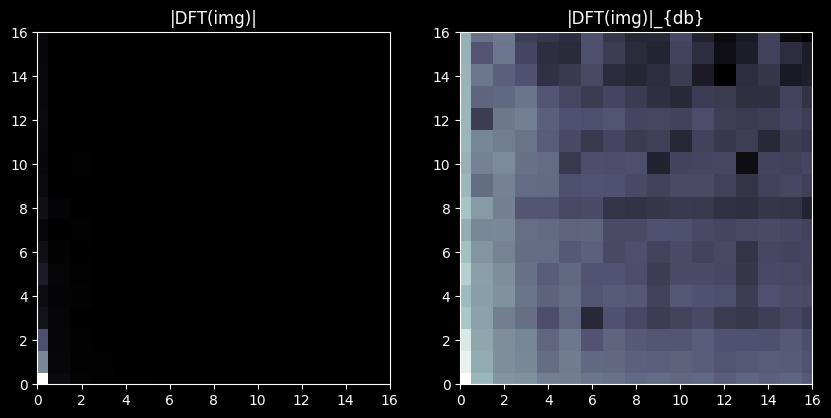

In [135]:
NFFT = 32
t_img = np.fft.fft2(u_img, (NFFT, NFFT))

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(np.abs(t_img), cmap='bone')
ax[0].set_xlim([0, NFFT/2]) #ignore repeated frequencies
ax[0].set_ylim([0, NFFT/2]);
ax[0].set_title('|DFT(img)|')


ax[1].imshow(20*np.log10(np.abs(t_img)), cmap='bone')
ax[1].set_xlim([0, NFFT/2]) #ignore repeated frequencies
ax[1].set_ylim([0, NFFT/2])
ax[1].set_title('|DFT(img)|_{db}');

Borders disconrinuity

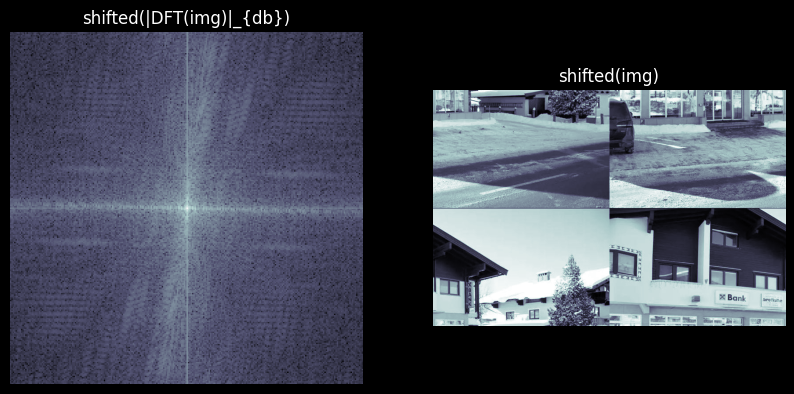

In [146]:
NFFT = 128
t_img = np.fft.fft2(u_img, (NFFT, NFFT))
t_img = np.fft.fftshift(t_img)
s_img = np.fft.fftshift(u_img)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(20*np.log10(np.abs(t_img)), cmap='bone')
ax[0].set_title('shifted(|DFT(img)|_{db})');
ax[0].axis('off');

ax[1].imshow(s_img, cmap='bone')
ax[1].set_title('shifted(img)');
ax[1].axis('off');

Angle edges

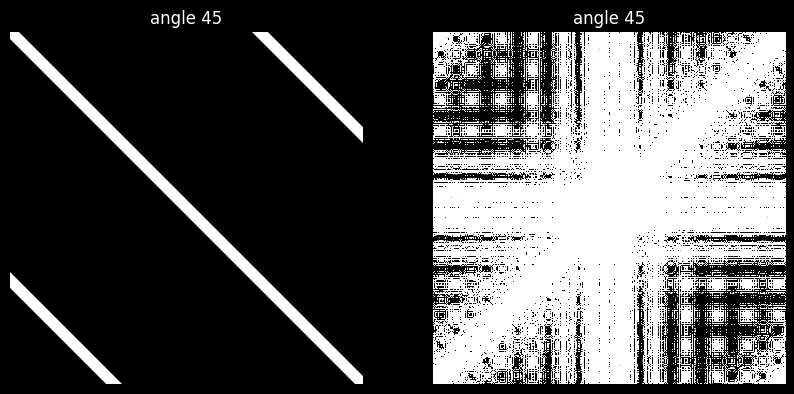

In [455]:
num_lines = 2 #@param{type:'integer'}
img_size = 512 #@param{type:'integer'}
NFFT = 511 #@param{type:'integer'}
angle = 45 #@param{type:'number'}
threshold = True #@param{type:'boolean'}
black_space = 0.99 #@param {type:'number'}

im = np.zeros((img_size,img_size))
t = np.linspace(0, img_size, img_size)
X, Y = np.meshgrid(t,t)

w = 2*np.pi/img_size*num_lines





theta = np.deg2rad(angle)
cos = np.cos(theta)
sin = np.sin(theta)
# center_x, center_y = img_size/2, img_size/2
# center_x, center_y = 0, 0
# X = (w*X - center_x) * cos - (w*Y - center_y) * sin# + center_x
# Y = (w*X - center_x) * sin + (w*Y - center_y) * cos# + center_y
X = w*X * cos - w*Y * sin
Y = w*X * sin + w*Y * cos

im = (np.cos(X, Y) + 1)/2
if threshold: 
   im = im > black_space


fim = np.abs(np.fft.fft2(im, (NFFT, NFFT)))
fim = 20*np.log10(fim+1E-10)
fim = np.fft.fftshift(fim)

fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(im, cmap='gray', vmin=0, vmax=1)
ax[0].axis('off');
ax[0].set_title(f'angle {angle}')

ax[1].imshow(fim, cmap='gray', vmin=0, vmax=1)
ax[1].axis('off');
ax[1].set_title(f'angle {angle}');